In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("vehicule.csv")
df



,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [4]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
df.shape

(846, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [9]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
df=df.dropna() 

In [11]:
df.shape

(813, 19)

In [17]:
df.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

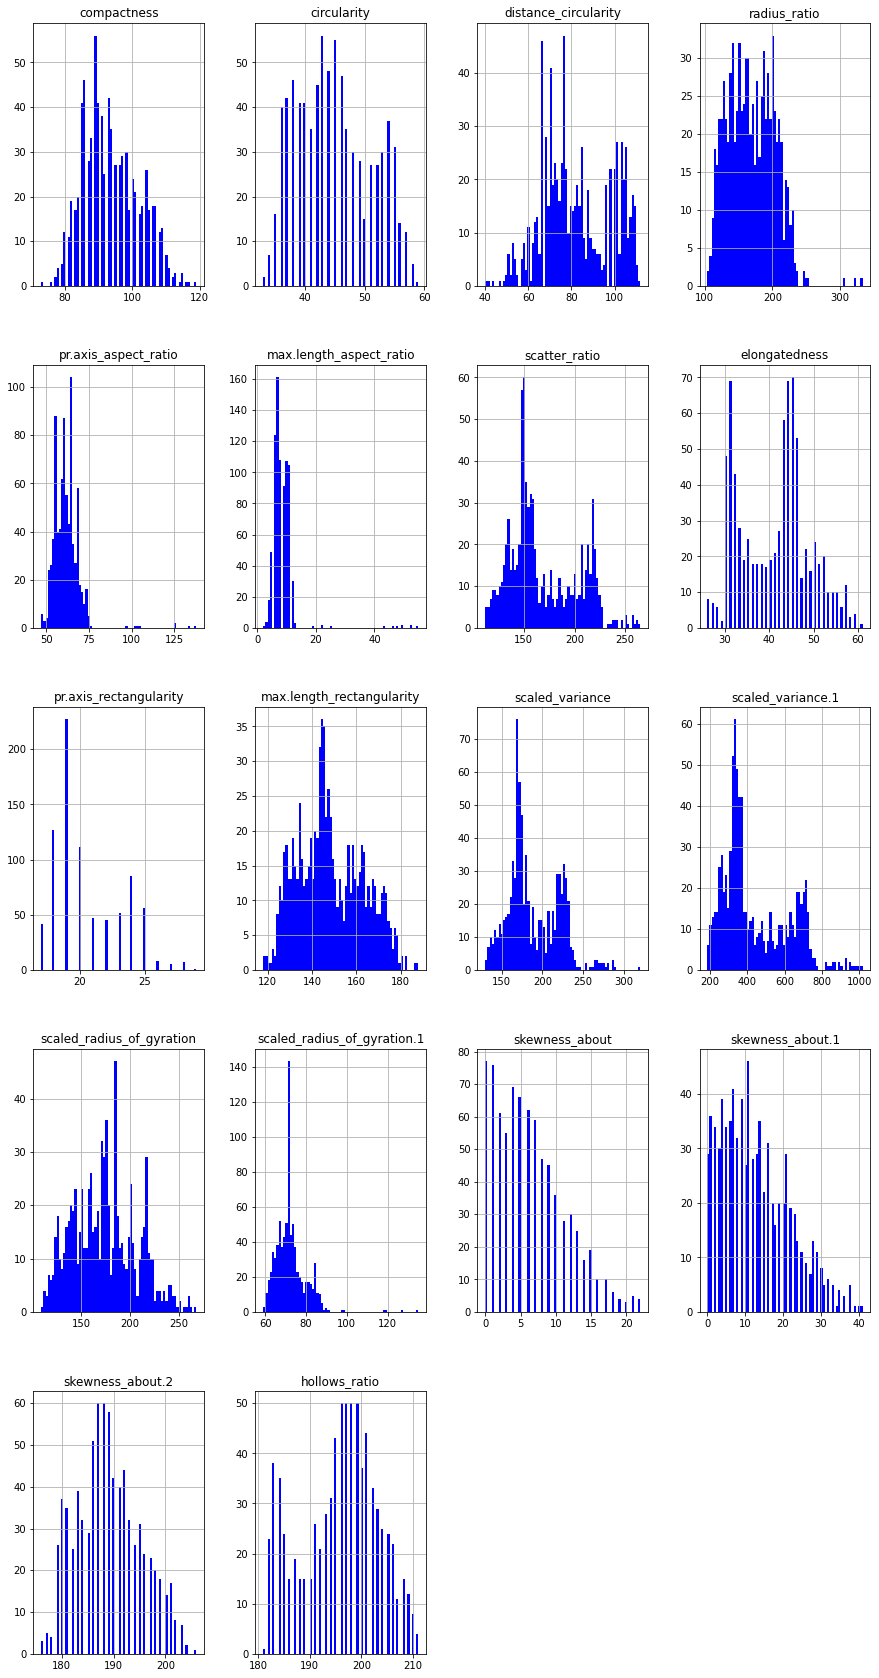

In [18]:
colonnes=list(df)
df[colonnes].hist(histtype='bar',bins=70,color='blue', figsize=(15,30)); 

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

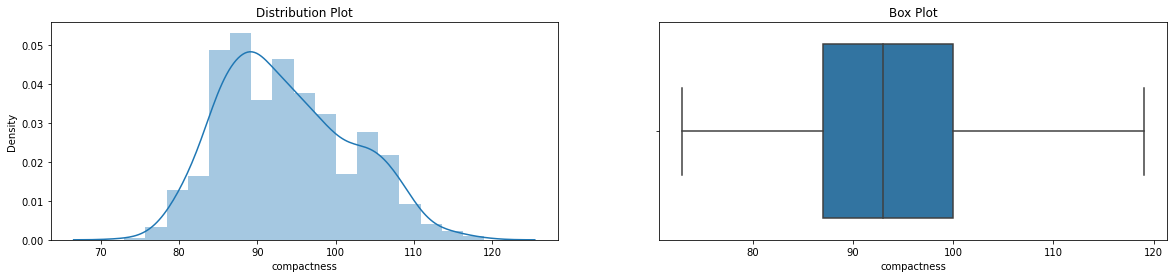

In [19]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['compactness'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

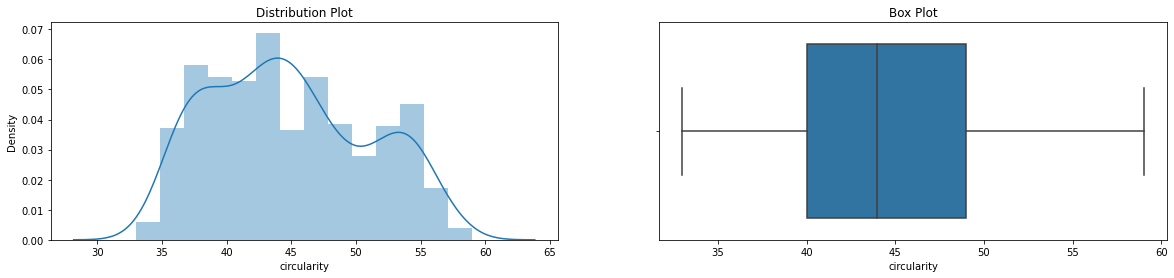

In [20]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['circularity'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

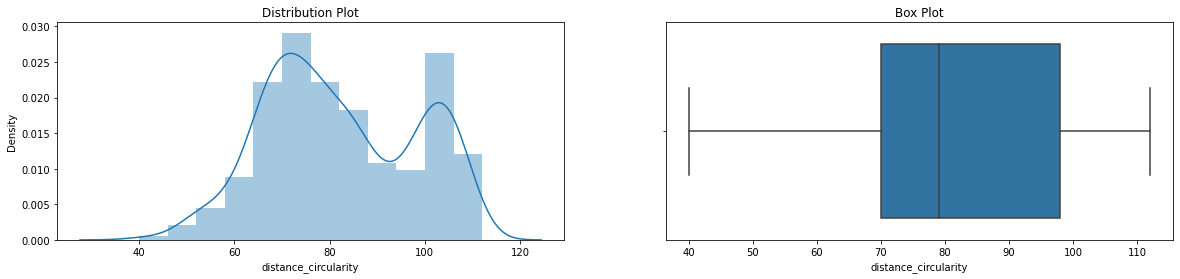

In [21]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

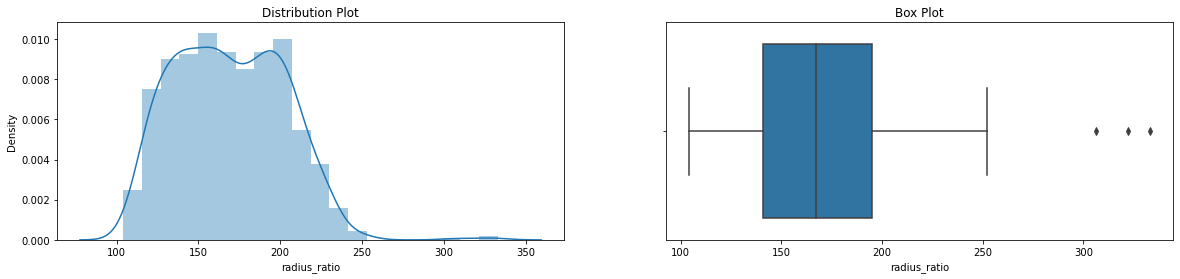

In [22]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")




/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

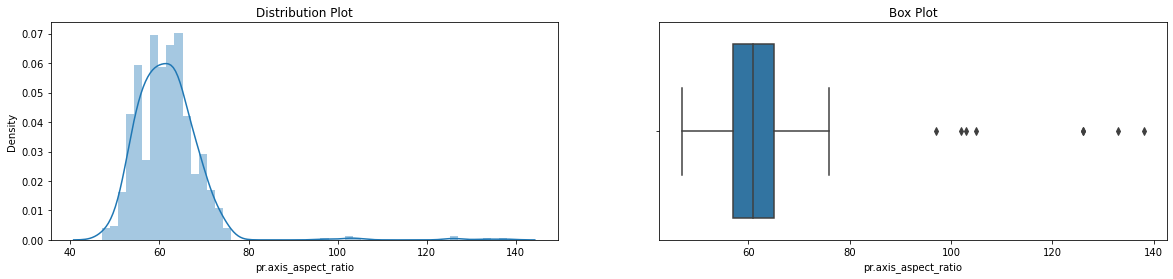

In [23]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")



/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

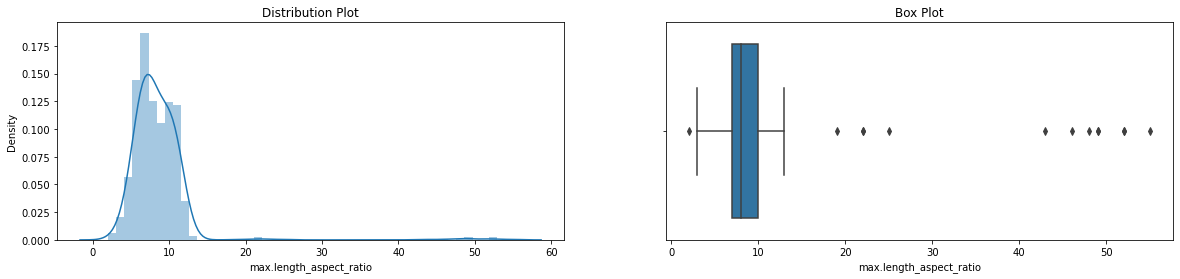

In [24]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

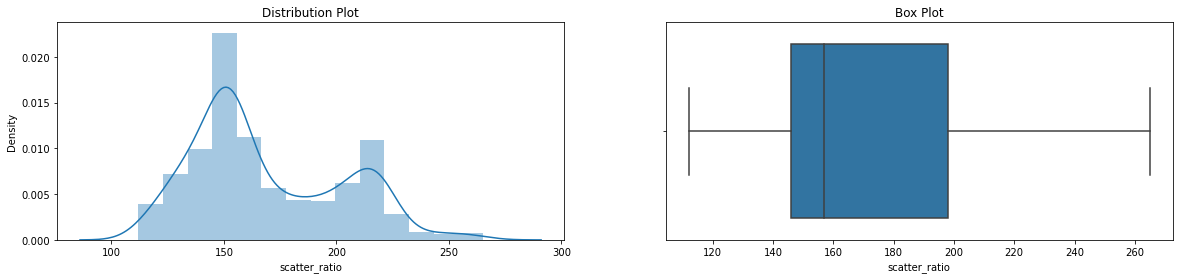

In [25]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

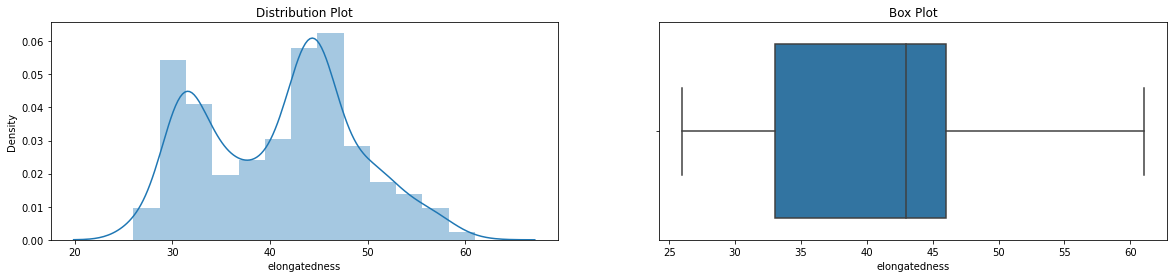

In [26]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

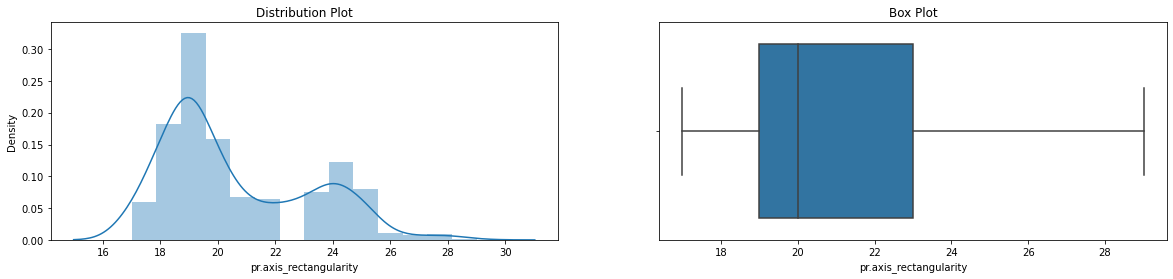

In [27]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

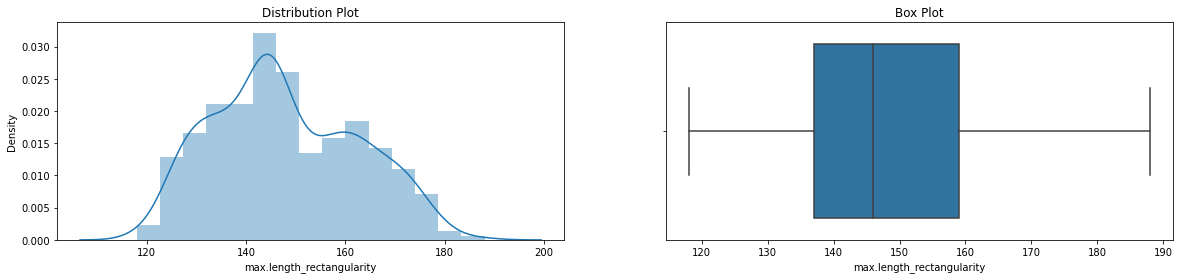

In [28]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

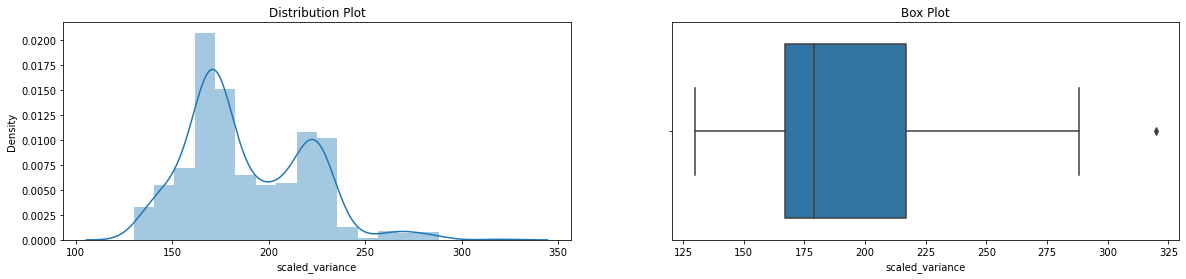

In [29]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

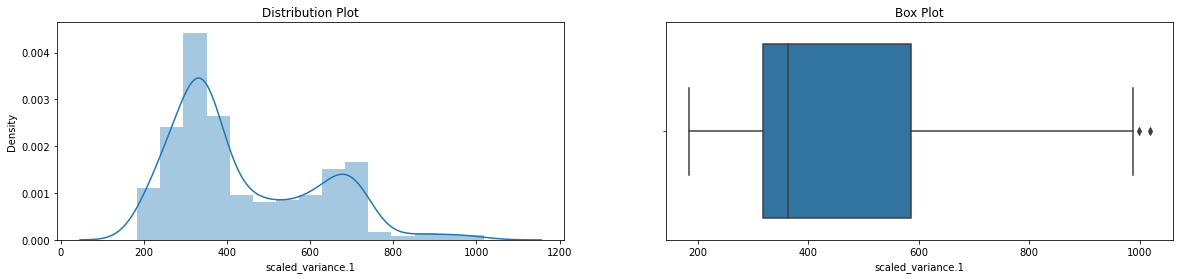

In [30]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

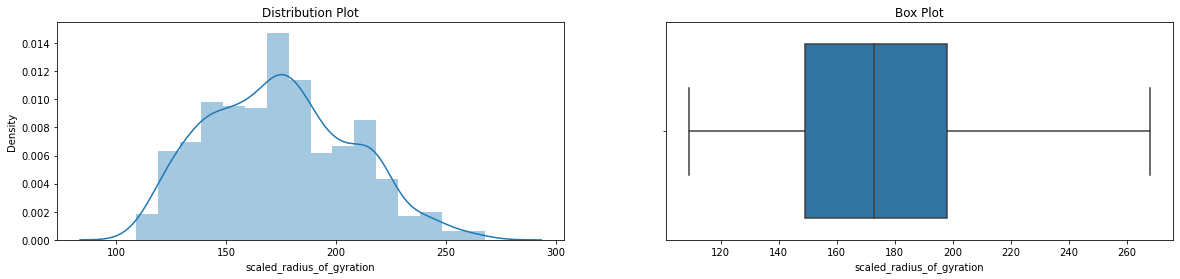

In [31]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

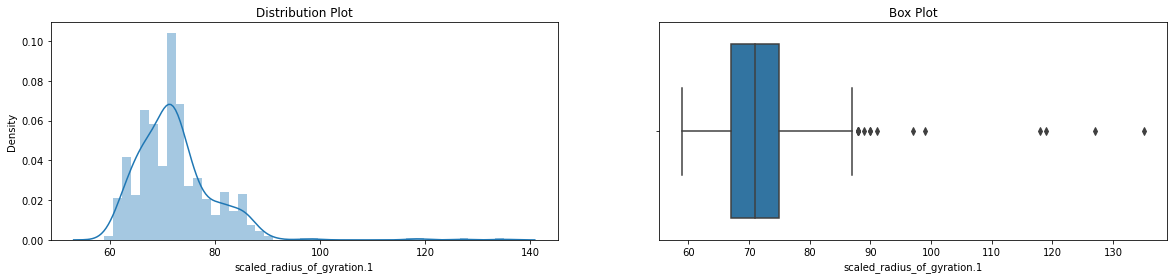

In [32]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

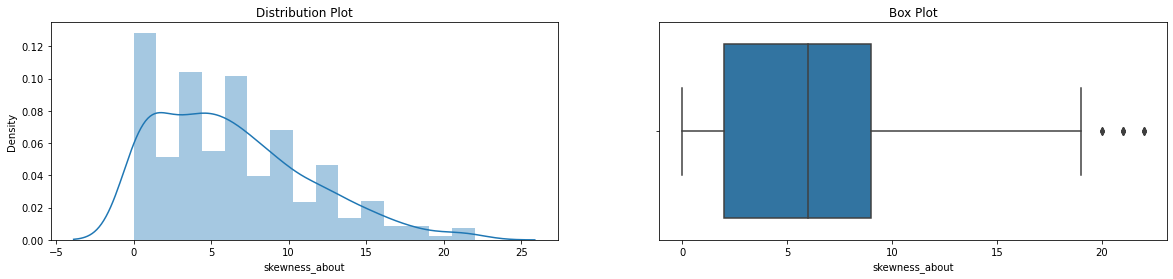

In [33]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

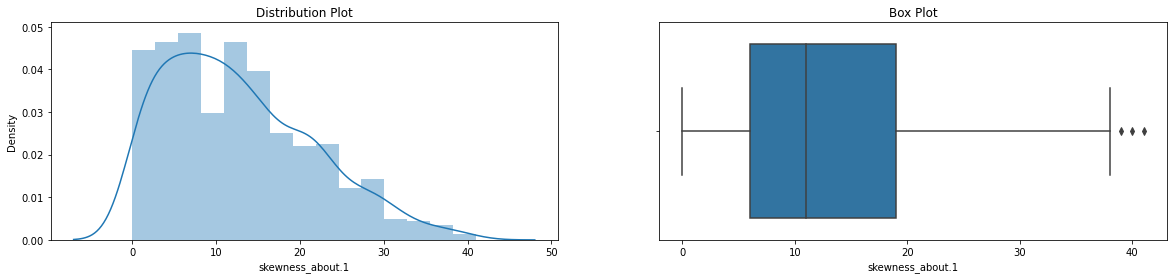

In [34]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

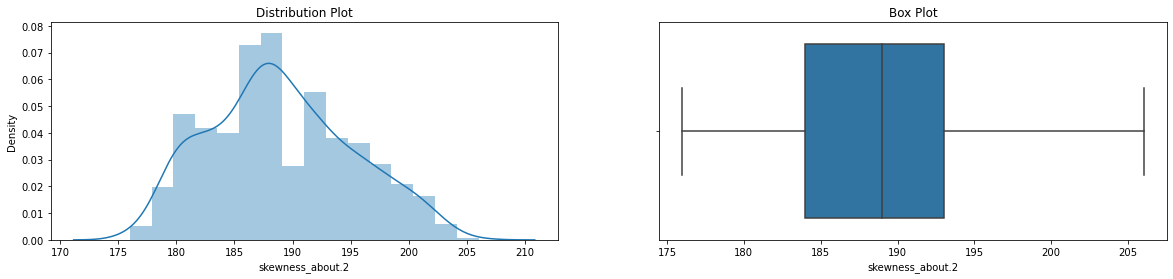

In [35]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

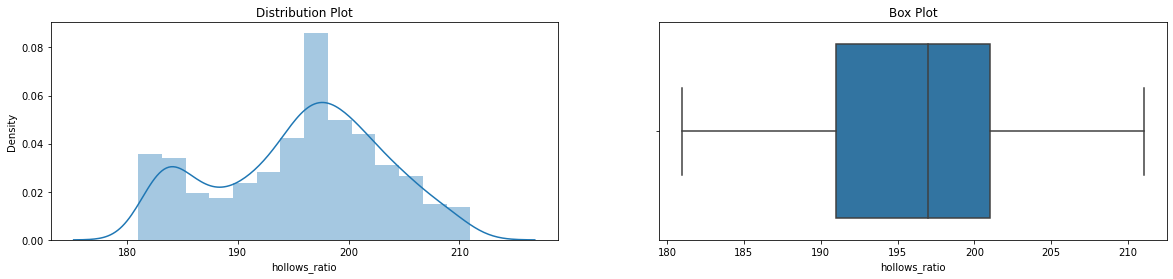

In [36]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(20,4)
sns.distplot(df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

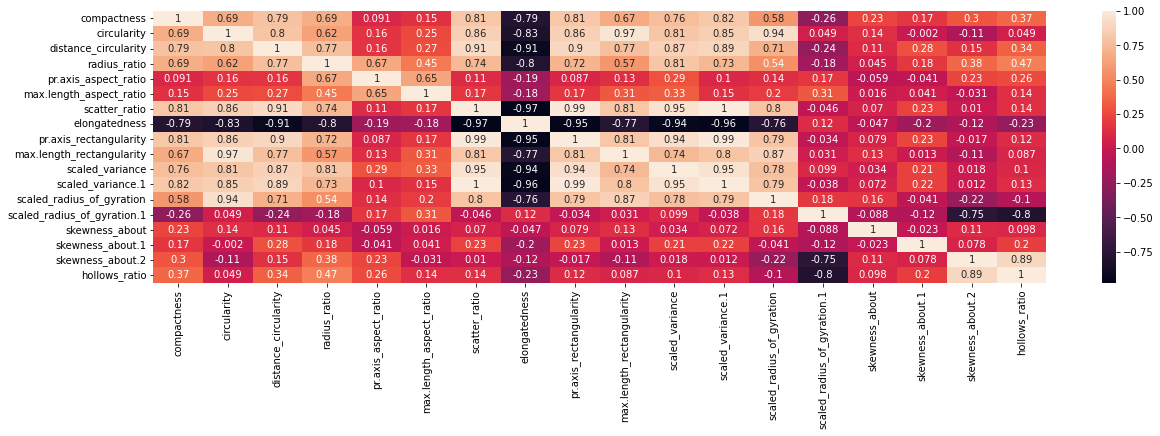

In [37]:
#Matrice de correlation
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [38]:
df=df.drop(labels=['scaled_radius_of_gyration','skewness_about.2', 'scatter_ratio' ,'elongatedness' ,'pr.axis_rectangularity','scaled_variance','scaled_variance.1'], axis=1)

In [39]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,max.length_rectangularity,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,159,70.0,6.0,16.0,197,van
1,91,41.0,84.0,141.0,57.0,9,143,72.0,9.0,14.0,199,van
2,104,50.0,106.0,209.0,66.0,10,158,73.0,14.0,9.0,196,car
3,93,41.0,82.0,159.0,63.0,9,143,63.0,6.0,10.0,207,van
4,85,44.0,70.0,205.0,103.0,52,144,127.0,9.0,11.0,183,bus


In [40]:
features=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 
        'max.length_rectangularity', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
        'hollows_ratio']

X=df[features]
Y=df['class']      

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [44]:
#Random Forest
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [45]:
model.score(X_test, y_test)

0.9447852760736196

In [46]:
#Naive Bayes
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [47]:
model.score(X_test,y_test)

0.6993865030674846

In [48]:
#Cross validation
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.73076923, 0.57692308, 0.68461538, 0.64615385, 0.64615385])

In [49]:
#Support vector machine
model = SVC()
model.fit(X_train, y_train)

SVC()

In [50]:
model.score(X_test, y_test)

0.6809815950920245

In [51]:
#regularisation
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.6809815950920245

In [52]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.901840490797546

In [53]:
model_C = SVC(C=30)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9263803680981595